In this project, "M5 Forcasting-Accuracy" I have used hierarchical sales data from Walmart, to forecast daily sales for the next 28 days. The data, covers stores in three US States (California, Texas, and Wisconsin) and includes item level, department, product categories, and store details. Forcasting methods help in guiding various bussiness strategies and effcient allocation of resources (i.e setting up inventories)


In [36]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#importing data
train_data= pd.read_csv("/Users/shrutiparulekar/Desktop/data science/kaggle/M5_Forcasting_Accuracy/sales_train_validation.csv")
calendar_data= pd.read_csv("/Users/shrutiparulekar/Desktop/data science/kaggle/M5_Forcasting_Accuracy/calendar.csv")
sell_prices_data= pd.read_csv("/Users/shrutiparulekar/Desktop/data science/kaggle/M5_Forcasting_Accuracy/sell_prices.csv")


In [12]:
##perform exploratory data analysis
#understanding the data structure
train_data.info()
calendar_data.info()
sell_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 215.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int

In [33]:
calendar_data['event_type_1'].value_counts()
print(train_data['dept_id'].value_counts())
train_data.columns
#train_data[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1','d_2', 'd_3']].head()
#pd.crosstab(calendar_data['event_type_1'], calendar_data['event_type_2'])

FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64


Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)

Text(0, 0.5, 'Score')

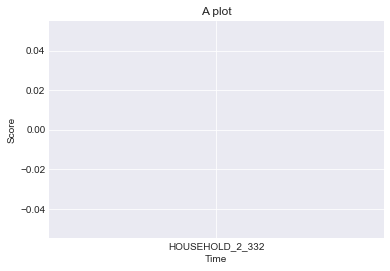

In [93]:
##plotting data to understand differences 
##randomly plotting some items to check trend over time
##add in the date varaible to the train data
train_data_tmp=pd.merge(train_data,calendar_data[['date','d']], left_on=  ['item_id'], 
                     right_on= ['d'],how = 'left') 

plot_df_tmp=train_data_tmp.sample(n=100, random_state=1)
plot_df_tmp.columns
plot_df=plot_df_tmp.loc[:, ~plot_df_tmp.columns.isin(['id', 'dept_id', 'cat_id', 'store_id','state_id'])]
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
#multiple line plot
num=0
for column in plot_df.drop('item_id', axis=1):
    num+=1
    plt.plot(plot_df['item_id'], plot_df['date'], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

## Add legend
#plt.legend(loc=2, ncol=1)
 
# # # Add titles
plt.title("A plot", fontsize=12, fontweight=0)
plt.xlabel("Time")
plt.ylabel("Score")

